# The Highest Paid Athletes of the last 29 years according to Forbes

![Lebron James](https://specials-images.forbesimg.com/imageserve/5dfd3fda0e40fc00080e70b2/1920x0.jpg?fit=scale)

This is a comprehensive list of highest paid athletes in the world over the last twenty-nine years. The list has been compiled by Forbes Magazing and shows the highest earning athletes for the period of 1990 - 2019. Given the time span, the information extractable from this list can show us which athletes have managed to sustain their career longetivity rather than burning fast and dying out early. It will also give us insight into which athletes are benefiting the most from their sporting skill as well as their ability to pull endorsements from big-name companies in order to boost their overall earnings. 

As you go through this EDA, the name of legendary basketball player, Kobe Bryant will feature more than once. Kobe was and still remains one of the best players to grace the game of basketball. May his legacy live on as a result of more than just his earnings but also his sheer greatness, discipline, dedication to his sport and athleticism. 

**Rest in Power Kobe and Gina.**

![Kobe_Gina](https://img.buzzfeed.com/buzzfeed-static/static/2020-01/26/23/asset/dfdc5f88d1c3/sub-buzz-2438-1580080422-1.jpg?downsize=800:*&output-format=auto&output-quality=auto)

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import matplotlib.ticker as tk

import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
path = '../input/forbes-highest-paid-athletes-19902019/'
df = pd.read_csv(path+'Forbes Richest Atheletes (Forbes Richest Athletes 1990-2019).csv')

As is customary for an exploratory data analysis, we get a preview of the table and get basic statistics on it. 

In [3]:
df.head(11)

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
5,6,Jack Nicklaus,USA,6,NaN,golf,1990,8.6
6,7,Greg Norman,Australia,7,NaN,golf,1990,8.5
7,8,Michael Jordan,USA,8,NaN,basketball,1990,8.1
8,9,Arnold Palmer,USA,8,NaN,golf,1990,8.1
9,10,Evander Holyfield,USA,8,NaN,boxing,1990,8.1


In [4]:
df.tail(11)

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
280,281,Matthew Stafford,USA,10,>100,American Football,2018,59.5
281,282,Lionel Messi,Argentina,1,2,Soccer,2019,127.0
282,283,Cristiano Ronaldo,Portugal,2,3,Soccer,2019,109.0
283,284,Neymar,Brazil,3,5,Soccer,2019,105.0
284,285,Canelo Alvarez,Mexico,4,15,Boxing,2019,94.0
285,286,Roger Federer,Switzerland,5,7,Tennis,2019,93.4
286,287,Russell Wilson,USA,6,??,American Football,2019,89.5
287,288,Aaron Rogers,USA,7,??,American Football,2019,89.3
288,289,LeBron James,USA,8,6,Basketball,2019,89.0
289,290,Stephen Curry,USA,9,8,Basketball,2019,79.8


In [5]:
year_groups = df.groupby('Year')
'Of course, the records span over %d years.' %len(year_groups)

'Of course, the records span over 29 years.'

To start with, one may be interested in knowing which athletes have enjoyed longetivity in their careers. In other words, who has appeared on this list more than once and how many times have they dominated? <br>

Below, the athletes are listed in order of appearance on the top 20 list during its 30 year history.

* ## Number of appearance of an athlete on the list in 29 years

In [6]:
list_len = 15
athletes = df.groupby(['Name','Nationality'])
df_appearances = athletes['Name'].count()\
                .reset_index(name='Count')\
                .sort_values(['Count'], ascending=0)\
                .head(list_len)
df_appearances_9_or_more = df_appearances[df_appearances['Count'] >= 9]
df_appearances_9_or_more

,Name,Nationality,Count
52,Michael Jordan,USA,19
78,Tiger Woods,USA,18
42,Kobe Bryant,USA,14
54,Michael Schumacher,Germany,13
44,LeBron James,USA,12
68,Roger Federer,Switzerland,11
65,Phil Mickelson,USA,11
74,Shaquille O'Neal,USA,9
14,Cristiano Ronaldo,Portugal,9
17,David Beckham,UK,9


In [7]:
fig = go.Figure( go.Bar(
              x = df_appearances_9_or_more.Count[::-1],
              y = df_appearances_9_or_more.Name[::-1],
              orientation='h', 
              opacity=0.5, 
              marker=dict(color='rgba(207, 0, 15, 1)'
              ))
               )

fig.update_traces(marker_line_color='rgb(10,48,107)')
fig.update_layout(title_text='Number of Appearances on the Forbes List between 1990-2019', 
                  xaxis_title='Number of Appearances', 
                  yaxis_title='Athletes') 

Apparently, the USA has produced 4/5 of the top 5 highest paid athletes of the last three decades. 
Does this equate to their dominance in producing the majority of highly paid athletes overall?

* ## Nations that have produced the high-earning athletes

In [8]:
# This is a standard operation which can be generalised
# The keys are set to upper to reduce case-sensitive duplicates 
def top_list(key, list_len):
    countries = df.groupby(df[key].str.upper())
    return countries[key].count()\
                .reset_index(name='Count')\
                .sort_values(['Count'], ascending=0)\
                .head(list_len)

df_countries = top_list( 'Nationality', 10 )
df_countries

,Nationality,Count
21,USA,200
9,GERMANY,13
20,UK,13
19,SWITZERLAND,11
15,PORTUGAL,9
0,ARGENTINA,8
3,BRAZIL,8
4,CANADA,6
11,ITALY,4
7,FINLAND,3


To emphasise this point even more, these stats can be visualised on a simple pie chart.

In [9]:
px.pie(df_countries, 'Nationality', 'Count', 
       color_discrete_sequence=px.colors.sequential.Viridis, 
       title="Tallied Representation of a Nation's Athletes on the Forbes List between 1990-2019")

## Sports that produce the highest earning athletes

In [10]:
df_sports = top_list( 'Sport', 10 )
df_sports

,Sport,Count
5,BASKETBALL,78
6,BOXING,46
10,GOLF,43
18,SOCCER,30
19,TENNIS,22
2,AUTO RACING,18
0,AMERICAN FOOTBALL,15
9,F1 RACING,8
4,BASEBALL,6
8,F1 MOTORSPORTS,5


In [11]:
px.pie(df_sports, 'Sport', 'Count', 
       color_discrete_sequence=px.colors.sequential.Cividis, 
       title="Tallied Representation of Sports on the Forbes List between 1990-2019")

Basketball and boxing have the highest paid athletes in the world. This seems to correlate rather nicely with the fact that 3/5 of the top 5 earners have all made their money from basketball: Michael Jordan, Kobe Bryant and Lebron James. <br> 

But how much did they actually earn?

* ## Highest earners on the list in the 29 year period

In [12]:
list_len = 10
athletes = df.groupby(['Name'])
df_earnings = athletes['earnings ($ million)'].sum().reset_index(name='Sum')\
                .sort_values(['Sum'], ascending=0)\
                .head(list_len)
df_earnings

,Name,Sum
76,Tiger Woods,1311.5
24,Floyd Mayweather,840.0
43,LeBron James,756.6
50,Michael Jordan,738.8
13,Cristiano Ronaldo,682.1
66,Roger Federer,674.8
52,Michael Schumacher,639.0
46,Lionel Messi,611.5
41,Kobe Bryant,601.1
63,Phil Mickelson,519.9


In [13]:
fig = go.Figure( go.Bar(
              x = df_earnings.Sum[::-1],
              y = df_earnings.Name[::-1],
              orientation='h', 
              opacity=0.5, 
              marker=dict(color='rgba(50, 171, 96, 0.6)'
              ))
               )

fig.update_layout(title_text='Career Earnings for Athletes on the Forbes List between 1990-2019', 
                 xaxis_title='Total Career Earnings (US$ million)', 
                 yaxis_title='Athletes')     

Floyd Mayweather is the second highest earner of all time despite not having a number of appearances in the annual list similar Tiger Woods, Lebron James or Michael Jordan yet his career has spanned over much less time than the afore mentioned veterans. How could this be?

In [14]:
df_mayweather = athletes.get_group('Floyd Mayweather')
'Despite earning this much over his career, Floyd Mayweather has only appeared on the list %d times.'\
%len(df_mayweather)
df_mayweather

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
192,193,Floyd Mayweather,USA,2,>10,boxing,2010,65.0
211,212,Floyd Mayweather,USA,1,?,Boxing,2012,85.0
231,232,Floyd Mayweather,USA,1,14,Boxing,2014,105.0
241,242,Floyd Mayweather,USA,1,1,Boxing,2015,300.0
271,272,Floyd Mayweather,USA,1,>100,Boxing,2018,285.0


It appears that Mayweather made gigantic leaps in his annual earnings in less than a decade.

* ## How quickly Floyd Mayweather's earnings rose

In [15]:
fig = go.Figure( go.Scatter(x=df_mayweather.Year, 
                            y=df_mayweather['earnings ($ million)'], 
                            line=dict(color='firebrick', width=3)
                           )
               )

#very customised layouts
fig.add_layout_image(
        dict(
            source="https://1284474717.rsc.cdn77.org/wp-content/uploads/2018/10/014_Floyd_Mayweather_vs_Conor_McGregor.jpg",
            xref="x",
            yref="y",
            x=2008.7, 
            y=315,
            sizex=300,
            sizey=300,
            opacity=0.33,
            layer="below")
)

fig.update_layout(
    title_text="Floyd Mayweather's Earnings throughout the years", 
    xaxis_title='Year', 
    yaxis_title='Earnings (US$ million)', 
    autosize=False,
    height=600, 
    width=800
)

After a steady rise in his earnings between 2010 and 2014, he almost tripled is annual earnings in 2015 after winning the "Fight of the Century" against Manny Pacquiao in a unaminous 12-round victory on the 2nd May 2015. 

* ## Earnings by year

We can take a look at the top earners for each year and their earnings with the passage of time. Racing bar plots have been rather popular on social media lately. @pratapvardhan put together a matplotlib version of this which I borrowed for this task. We get an animated view of the changing Top 10 Forbes top-earning athlete's list every year, how much they earned during that year and their country of origin. 

In [16]:
df_race_bar = df[['Name', 'Year', 'Nationality', 'earnings ($ million)' ]]
dff = df_race_bar.groupby(['Year'])

In [17]:
def draw_barchart(year):
    dff_year = dff.get_group(year)\
                  .sort_values(by='earnings ($ million)', ascending=1)
    colors = dict(zip(
        ['USA', 'Germany', 'Switzerland', 'Portugal',
         'Portugal', 'Argentina', 'Brazil', 'Australia', 
        'Italy', 'Finland', 'Canada', 'UK', 'France', 
        'Ireland', 'Austria', 'Russia', 'Dominican', 
        'Philippines', 'Spain', 'Serbia', 'Mexico', 
        'Northern Ireland'],
        ['#b6c4ef', '#ffb3ff', '#90d595', '#e48381',
         '#aafbff', '#f7bb5f', '#eafb50', '#e58285', 
        '#16a085', '#f54565', '#f39c12', '#bfc9ca', 
          '#e1dbdb', '#a9dfbf', '#f9e79f', '#d6eaf8', 
         '#d7bde2', '#f7dc6f', '#2980b9', '#9a45b5', 
        '#4377cf', '#0e9921']
    ))
    
    group_lk = df.set_index('Name')['Nationality'].to_dict()
    
    ax.clear()
    ax.barh(dff_year['Name'], dff_year['earnings ($ million)'],
            color=[colors[group_lk[x]] for x in dff_year['Name']])
    
    for i, (value, name) in enumerate(zip(dff_year['earnings ($ million)'], dff_year['Name'])):
        ax.text(value-0.5, i,     name,            ha='right', size=14, fontweight='bold')  # Athlete's name
        ax.text(value-0.5, i-.3, group_lk[name],  ha='right')  # Nationality
        ax.text(value+0.2, i,     value,      ha='left', size=14)   # Earnings    
    
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Earnings ($ millions)', transform=ax.transAxes, size=16, color='#777777')
    ax.xaxis.set_major_formatter(tk.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The highest paid Athletes from 1990 to 2019',
            transform=ax.transAxes, size=20, weight=600, ha='left')
    ax.text(1, 0, 'by @pratapvardhan; credit @jburnmurdoch', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)

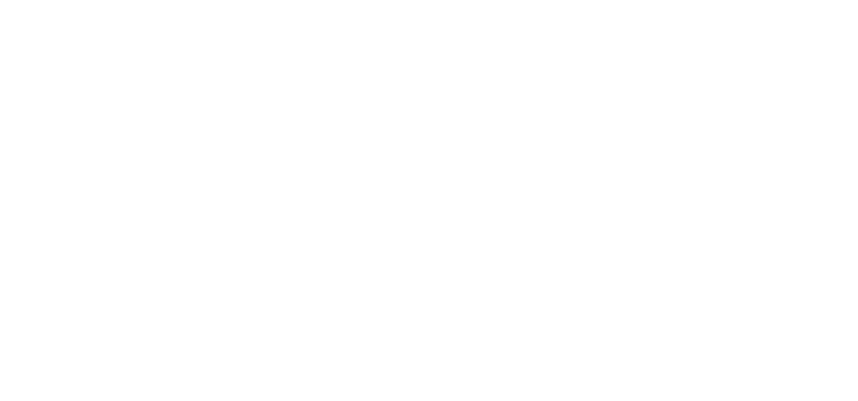

In [18]:
fig, ax = plt.subplots(figsize=(15,7))
frames = [ i for i in range(1990,2020) if i != 2001 ]
def init():
    ax.clear()
    ax.set_yticks([])
    ax.set_xticks([])
animator = animation.FuncAnimation(fig, draw_barchart, frames=frames, blit=False, init_func=init)
HTML(animator.to_jshtml(fps=6))